In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from math import sqrt

# Importing libraries for plotting Q-Q plot
import scipy.stats as stat
import pylab

# Importing the Ridge Regression
from sklearn.linear_model import Ridge

# Importing the libraries for Hyperparameter Tuning
from sklearn.model_selection import RandomizedSearchCV #-----Randomized Search CV
from sklearn.model_selection import GridSearchCV #----Grid Search CV

# Importing R-Square, Mean absolute error, Mean-squared error for evaluation
from sklearn.metrics import r2_score, mean_absolute_error,  mean_squared_error

# Importing warnings for ignoring any warnings in the program
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Loading dataset----Using Outlier treated dataset
car_ridge = pd.read_csv("Car_Preprocess_Outlier.csv")
#----Regression sensitive towards outliers

# Viewing the dataset
car_ridge.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Years_Used,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,6,0,1,0,1
1,4.75,9.54,43000,0,7,1,0,0,1
2,7.25,9.85,6900,0,3,0,1,0,1
3,2.85,4.15,5200,0,9,0,1,0,1
4,4.60,6.87,42450,0,6,1,0,0,1


In [4]:
# Function for plotting Q-Q Plot----Visualizing data distribution
def plot_data(df, feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    df[feature].hist()
    plt.subplot(1,2,2)
    stat.probplot(df[feature], dist="norm", plot=pylab)
    plt.show()

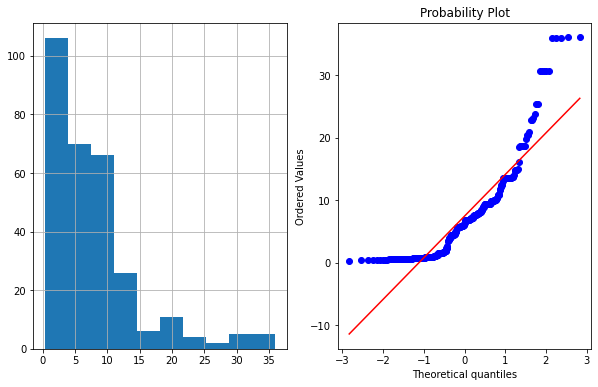

In [5]:
plot_data(car_ridge, "Present_Price")

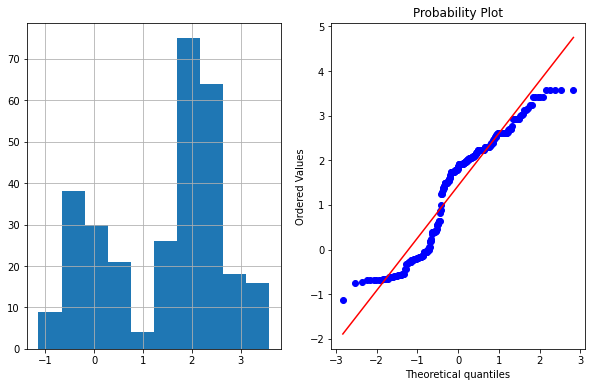

In [6]:
# Performing Lograthimic Transformation on feature "Present_Price"-Linear Regression assumes data to be normally distributed
car_ridge["Present_Price_Log"] = np.log(car_ridge["Present_Price"])
plot_data(car_ridge, "Present_Price_Log")

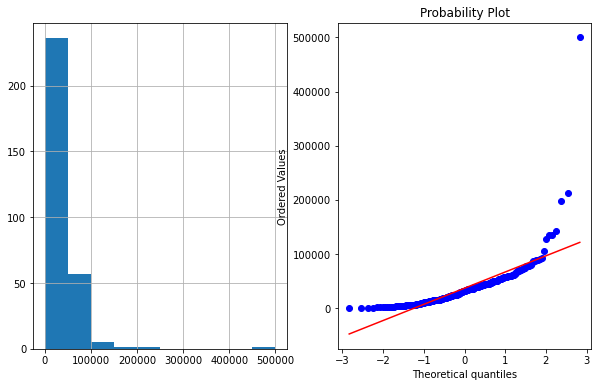

In [7]:
plot_data(car_ridge, "Kms_Driven")

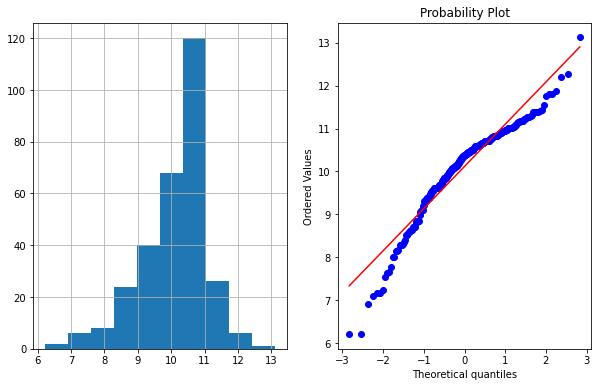

In [8]:
# Performing Lograthimic Transformation on feature "Kms_Driven"----Linear Regression assumes data to be normally distributed
car_ridge["Kms_Driven_Log"] = np.log(car_ridge["Kms_Driven"])
plot_data(car_ridge, "Kms_Driven_Log")

In [9]:
# Dropping the non-transformed features
car_ridge.drop(["Present_Price", "Kms_Driven"], axis=1, inplace=True)
car_ridge.head()

,Selling_Price,Owner,Years_Used,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual,Present_Price_Log,Kms_Driven_Log
0,3.35,0,6,0,1,0,1,1.720979,10.203592
1,4.75,0,7,1,0,0,1,2.255493,10.668955
2,7.25,0,3,0,1,0,1,2.287471,8.839277
3,2.85,0,9,0,1,0,1,1.423108,8.556414
4,4.60,0,6,1,0,0,1,1.927164,10.656082


In [10]:
# Separating the independent and dependent features
X_data = car_ridge.iloc[:,1:]
y_data = car_ridge["Selling_Price"]

# Finding shape of independent and dependent variables
X_data.shape, y_data.shape

((301, 8), (301,))

In [11]:
# Importing KFold cross-validation for splitting dataset 
from sklearn.model_selection import KFold

# Creating object of KFold
kf = KFold(n_splits = 5, shuffle = True, random_state = None) #----Performing 5-Fold cross-validation

In [12]:
# Splittting dataset into training and testing part using cross-validation
for train_index, test_index in kf.split(X_data):
    X_train, X_test = X_data.iloc[train_index,:], X_data.iloc[test_index,:]
    y_train, y_test = y_data.iloc[train_index], y_data.iloc[test_index]

# Finding out the shape of training and testing set
X_train.shape, X_test.shape
y_train.shape, y_test.shape

((241, 8), (60, 8))

((241,), (60,))

### Ridge Regression------Randomized SearchCV

In [13]:
# Creating the object of Ridge Regression Class
ridge_reg = Ridge(normalize = True)

In [14]:
# Creating parameter grid for hyper-parameter optimization
param_grid = {"alpha" : np.random.uniform(low=0, high=10, size=(50,)),
             "fit_intercept" : ([True, False]),
             "solver" : (['svd', 'cholesky', 'sparse_cg', 'sag'])}
#----Setting different values for various parameters of Ridge Regression

# Hyperparameter optimization using Randomized Search CV
ridge_reg_randomcv = RandomizedSearchCV(estimator = ridge_reg, param_distributions = param_grid, n_iter = 100, n_jobs = -1)
#----Parameter grid being passed for performing hyperparameter optimization

In [15]:
# Fitting the model
ridge_reg_randomcv.fit(X_train,y_train)

RandomizedSearchCV(estimator=Ridge(normalize=True), n_iter=100, n_jobs=-1,
                   param_distributions={'alpha': array([5.18839199, 2.83172961, 5.55467308, 1.73391224, 6.79672064,
       7.25233471, 0.02142004, 6.3584211 , 1.88154224, 3.10261155,
       5.63875474, 2.22749337, 0.42526751, 9.08053219, 2.42536167,
       7.54870626, 2.69888242, 6.15278301, 8.93855604, 0.45438071,
       5.64162358, 1.6422744 , 6....
       0.47906778, 9.22868907, 1.61660811, 8.5341028 , 4.91767928,
       0.26358233, 1.61945838, 1.63412517, 7.27543369, 3.56672908,
       8.65119919, 9.49403336, 0.31765663, 1.50863682, 6.61301303,
       6.82058091, 9.52412549, 5.87983594, 0.27474033, 2.16221725,
       2.77025586, 5.39141364, 3.33225053, 4.97744002, 2.65565384]),
                                        'fit_intercept': [True, False],
                                        'solver': ['svd', 'cholesky',
                                                   'sparse_cg', 'sag']})

In [16]:
# Finding the best parameter after performing hyperparameter tuning
ridge_reg_randomcv.best_params_

{'solver': 'sag', 'fit_intercept': False, 'alpha': 9.080532190942872}

In [17]:
# Passing the best parameter to Ridge Regression for model building
best_param_ridge_reg = Ridge(alpha =  9.080532190942872, normalize = True, solver = "sag", fit_intercept = False)

# Fitting the model after hyperparameter optimization
best_param_ridge_reg.fit(X_train, y_train)

Ridge(alpha=9.080532190942872, fit_intercept=False, normalize=True,
      solver='sag')

In [18]:
# Finding out the slope and intercept terms after fiting the model
print("Slope: %.3f" %best_param_ridge_reg.coef_[0]) #----Slope
print("Intercept: %.3f" %best_param_ridge_reg.intercept_) #----Intercept

Slope: -0.545
Intercept: 0.000


In [19]:
# Prediction
y_pred = best_param_ridge_reg.predict(X_test)#----Prediction on testing set
y_train_pred = best_param_ridge_reg.predict(X_train)#----Prediction on training set

In [20]:
# Creating a new dataframe having actual and predicted values
comp_df = pd.DataFrame({"Actual" : y_test, "Predicted" : y_pred})
comp_df.head()
#---Used for comparision purpose

,Actual,Predicted
8,8.75,8.580241
16,7.25,9.021591
22,4.40,6.433169
29,7.45,8.938050
34,5.50,7.695688


<AxesSubplot:xlabel='Selling_Price', ylabel='Density'>

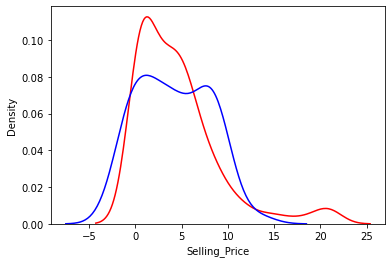

In [21]:
# Visualising the comparision between Actual and Predicted values
ax_1 = sns.distplot(car_ridge["Selling_Price"], hist = False, color = "r", label = "Actual_Value")
sns.distplot(y_pred, hist = False, color = "b", label = "Fitted_Value", ax = ax_1)

In [22]:
# Function for calculating Adjusted R-square
def adj_r2(x,y):
    r2 = best_param_ridge_reg.score(x,y)
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
    return adjusted_r2

In [23]:
# Model Evaluation using R-square 
print('R^2 train: %.3f, test: %.3f' %(r2_score(y_train, y_train_pred),r2_score(y_test, y_pred)))

# Model Evaluation using Adjusted R-square
print('Adjusted R^2 train: %.3f, test: %.3f' %(adj_r2(X_train,y_train),adj_r2(X_test,y_test)))

R^2 train: 0.775, test: 0.855
Adjusted R^2 train: 0.767, test: 0.832


In [24]:
# Model Evaluation using Mean Absolute Error
print('Mean Absolute Error: train: %.3f, test: %.3f' %(mean_absolute_error(y_train, y_train_pred),mean_absolute_error(y_test, y_pred)))

# Model Evaluation using Root Mean Squared (RMSE) Error
print('Root Mean Squared Error: train: %.3f, test: %.3f' %(sqrt(mean_absolute_error(y_train, y_train_pred)),sqrt(mean_absolute_error(y_test, y_pred))))

Mean Absolute Error: train: 1.603, test: 1.202
Root Mean Squared Error: train: 1.266, test: 1.096
